 # Homework 9 FV3 MPAS
 ### ATSC 507
 #### Christopher Rodell
 ---
 #### Question 1
 (/10) Consider a 1D domain, from x = −1 to x = 1. For N = 3
 (i.e. 3 Voronoi regions), find the locations of the generating
  points zi of a centroidal Voronoi tessellation for the density
   function ρ = 1. You should be able to do this by inspection,
   but explain how you got your answer regardless.
 ##### Answer 1.a
 Points need to be at the center of mass for the
 individual Voronoi region in a centroidal Voronoi
 tessellation. With N=3 and bounds from -1 to 1 or
 (2 in length) places the centers ever (2/3) or in
 this case at [ -2/3, -0, 2/3]
 $$
 \\
 $$
 <img src="1D.png">

 Then, for the same domain, consider a sequence of points x = −0.9, −0.8, −0.7, ..., 0.7, 0.8, 0.9. Using the points in the sequence, approximate the cell centroids for N = 3. Does your answer match what you got by inspection? Why or why not?
 $$
 \\
 $$
 Hint 1: You should divide up the sequence of points into 3 regions between x = −1 and x = 1 for summation.
 $$
 \\
 $$
 Hint 2: Using a spreadsheet or a programming language may help with your computation.
 $$
 \\
 $$

In [1]:
import context
import numpy as np 

N = 3
rho = 1
x = np.arange(-0.9, 1, 0.1)


Voronoi = {}
vlen = int(len(x) / N)
cell1 = x[0:vlen+1]
Voronoi['region 1'] = cell1
cell2 = x[vlen:(2*vlen) +1]
Voronoi['region 2'] = np.round(cell2,1)
cell3= x[(2*vlen):]
Voronoi['region 3'] = cell3


print(Voronoi)

******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/765afb79-d53d-4ca1-ad18-ebd00d6542a7
******************************

through /Users/rodell/atsc507/py/hw9/context.py -- pha
{'region 1': array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3]), 'region 2': array([-0.3, -0.2, -0.1, -0. ,  0.1,  0.2,  0.3]), 'region 3': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}


 ##### Answer 1.b
 Nope, we get different center points, [-0.6, 0, 0.6]
 This is because we are using a dx of 0.1 with this
 new sequence and computers dont like a recurring decimal

 #### Question 2
 (/10) Assume a constant, positive vertical velocity w blowing across MPAS
 vertical levels. Write down the vertical flux divergence (i.e. fluxtop -
 fluxbottom) of a cell-averaged scalar ψ for cell k, expressed in terms
 of ψk−1,ψk,ψk+1, to third-order accuracy. Explain why your chosen scheme
 is an upwind-biased scheme.
 $$
 \\
 $$
 Hint: You may start from the expression of the flux across the top edge of
 the cell, i.e. the already-derived F_k+1/2 . Unless you desperately want to,
 there is no need to start from the original FV definitions to derive the
 flux divergence.
 $$
 \\
 $$
 <img src="flux.png">

 ##### Answer 2

 $$
 \begin{aligned}
 F_{k+\frac{1}{2}} &= \underbrace{\psi_{k+1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} +\frac{\beta}{12} \delta_{z}^{2}\right)}_{Downwind} \\ \\&+ \underbrace{\psi_{k}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} -\frac{\beta}{12} \delta_{z}^{2}\right)}_{Upwind}
 \end{aligned}
 $$
 $$
 \\
 $$
 $$
 \begin{aligned}
 F_{k-\frac{1}{2}} &= \underbrace{\psi_{k-1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} -\frac{\beta}{12} \delta_{z}^{2}\right)}_{Upwind} \\ \\&+ \underbrace{\psi_{k}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} +\frac{\beta}{12} \delta_{z}^{2}\right)}_{Downwind}
 \end{aligned}
 $$
 $$
 \begin{aligned}
 F_{top} - F_{bottom} &= F_{k+\frac{1}{2}} - F_{k-\frac{1}{2}} \\ &= \underbrace{\psi_{k+1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} +\frac{\beta}{12} \delta_{z}^{2}\right)}_{Downwind} + \underbrace{\psi_{k}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} -\frac{\beta}{12} \delta_{z}^{2}\right)}_{Upwind} \\ \\ &-\underbrace{\psi_{k-1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} -\frac{\beta}{12} \delta_{z}^{2}\right)}_{Upwind} - \underbrace{\psi_{k}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} +\frac{\beta}{12} \delta_{z}^{2}\right)}_{Downwind}
 \end{aligned}
 $$
 $$
 \boxed{\begin{aligned}
 F_{top} - F_{bottom} = \underbrace{\psi_{k+1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} +\frac{\beta}{12} \delta_{z}^{2}\right)}_{Downwind} - \underbrace{\psi_{k-1}\left(\frac{1}{2}-\frac{1}{12} \delta_{z}^{2} -\frac{\beta}{12} \delta_{z}^{2}\right)}_{Upnwind}
 \end{aligned}}
 $$
 **The opposing signs in the downwind component result in a lesser
 weight than the upwind component. This helps model stability
 to ensure more flux isn't leaving than available.**

 #### Question 3
 (/5) For a cube with dimensions 2a × 2a × 2a inscribed within a sphere
 with radius R, show that:
 $$
 a^{2}+b^{2}= c^{2}
 $$
 <img src="circle.png">

 ##### Answer 3

 Where..
 $$
 (2a)^{2}+(2a)^{2}= 2\sqrt{2}a
 $$
 and..
 $$
 (2a)^{2}+(2\sqrt{2}a)^{2}= 2\sqrt{3}a
 $$
 so..
 $$
 R = \sqrt{3}a
 $$
 thus..
 $$
 a=\frac{\sqrt{3}}{3} R
 $$
 $$
 a=\frac{\sqrt{3}}{3} \sqrt{3}a
 $$
 $$
 a=a
 $$
 Hooray!

 #### Question 4
 (/20) Using a programming language of your choice, construct and plot
 a c12 cubed-sphere mesh using (a) an equidistant gnomonic projection,
 and (b) an equiangular gnomonic pro- jection. Your plots should be
 similar to Fig. 1c in Putman and Lin (2007): “Finite-volume transport
 on various cubed-sphere grids.” Obviously your meshes would be of a
 much coarser resolution. How do your two different projections
 compare? What happens to the two projections when you increase
 the resolution of your meshes, say to c24, c36, c48, etc.?

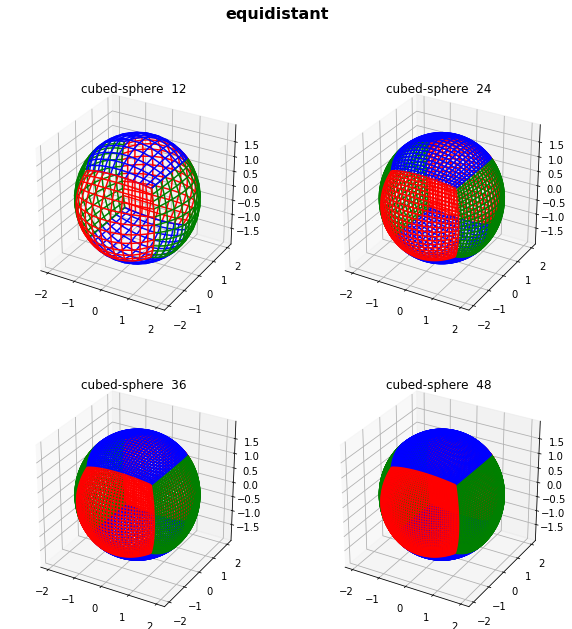

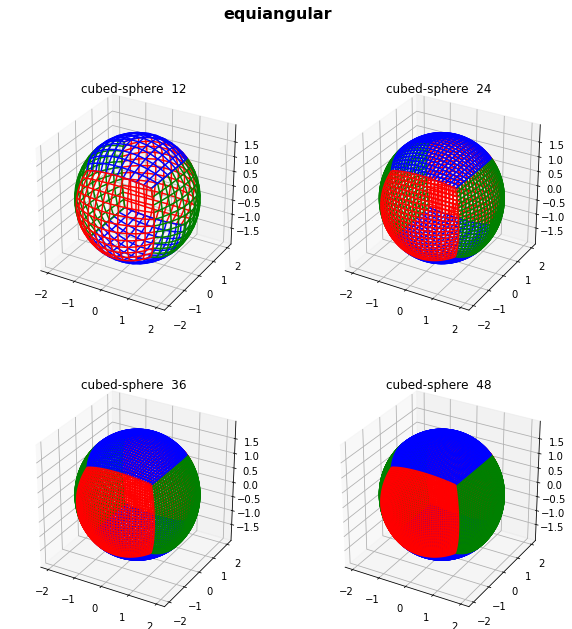

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gnomonic(R,c,projection):

    if projection == 'equidistant':
        a = (np.sqrt(3) / 3) * R
        x = np.linspace(-a, a, c)
        y = np.linspace(-a, a, c)
        x_local, y_local = np.meshgrid(x, y)

    elif projection == 'equiangular':
        a = np.pi / 4
        x0 = np.linspace(-a, a, c) 
        y0 = np.linspace(-a, a, c) 
        x = a * np.tan(x0)
        y = a * np.tan(y0)
        x_local, y_local = np.meshgrid(x, y)
    else:
        exit

    r = np.sqrt(a**2 + x_local**2 + y_local**2)

    X_top, X_bottom = (R/r)*x_local, (R/r)*(-x_local)
    Y_top, Y_bottom = (R/r)*y_local, (R/r)*(-y_local)
    Z_top, Z_bottom = (R/r)*a, (R/r)*(-a)

    return X_top, X_bottom, Y_top, Y_bottom, Z_top, Z_bottom


projection = ["equidistant", "equiangular"]
c = [12, 24, 36, 48]
R = 2
for j in range(len(projection)):
    fig = plt.figure(figsize = [10,10])
    fig.suptitle(str(projection[j]), fontsize= 16, fontweight="bold")
    for i in range(len(c)):
        X_top, X_bottom, Y_top, Y_bottom, Z_top, Z_bottom = gnomonic(R,c[i],projection[j])

        ax = fig.add_subplot(2, 2, ( i + 1), projection='3d')
        ax.set_title("cubed-sphere  " + str(c[i]))
        ax.plot_wireframe(X_top, Y_top, Z_top, color = 'b')
        ax.plot_wireframe(X_bottom, Y_bottom, Z_bottom, color = 'b') 
        ax.plot_wireframe(Z_top, X_top, Y_top, color = 'g')
        ax.plot_wireframe(Z_bottom, X_bottom, Y_bottom, color = 'g')
        ax.plot_wireframe(X_top, Z_top, Y_top, color = 'r') 
        ax.plot_wireframe(X_bottom, Z_bottom, Y_bottom, color = 'r')
plt.show()

 ##### Answer 4
 As the name suggests equiangular has a more uniform cell shape than the equidistant method.
 However, equidistant keep a more uniform cell size. When you increase the resolution you
 increase the number of grid cells.